<a href="https://colab.research.google.com/github/AlienX77-cmd/Deep-Learning-Practice-Projects/blob/main/DL_Breast_Cancer_Classification_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

##**Data Collection & Data Processing**

In [26]:
# Loading the data from sklearn
breast_dataset = sklearn.datasets.load_breast_cancer()
print(breast_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [27]:
# Loading the data into Pandas data frame
data_frame = pd.DataFrame(breast_dataset.data, columns = breast_dataset.feature_names)

In [28]:
# Adding 'target' column to the dataframe
data_frame['target'] = breast_dataset.target
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
# Showing the number of rows and columns
data_frame.shape

(569, 31)

In [30]:
# Showing some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [31]:
# Checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [32]:
# Showing statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [33]:
# Showing the distribution of Target Varibale
data_frame['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

1 means Benign 

0 means Malignant

In [34]:
data_frame.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


###**- Separating the features and target**


In [36]:
X = data_frame.drop(columns='target', axis=1)
Y = data_frame['target']

In [37]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [38]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [39]:
# test_size=0.2 ==> 20% of data is going to be test data and 80% of data is a training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


###**- Standardize the data**

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

##**Building the Neural Network**


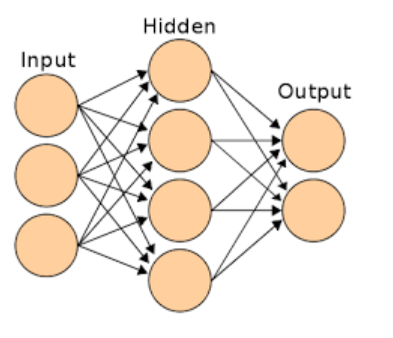

In [42]:
# Importing Tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [43]:
# Setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)), #input layer with 30 features (from datset) (converts 30 features to 1 dimension)
                          keras.layers.Dense(20, activation='relu'), #inner layer with 20 neurons
                          keras.layers.Dense(2, activation='sigmoid') #output layer (2 classes: 0 for Malignant, 1 for Benign)
])

In [49]:
# Compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Training the Neural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)
# epochs = number of iterations (how many times the model will go through the dataset)

Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 0.5798 - accuracy: 0.7237 - val_loss: 0.3884 - val_accuracy: 0.9130
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8631 - val_loss: 0.2845 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8924 - val_loss: 0.2272 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.9095 - val_loss: 0.1939 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9218 - val_loss: 0.1719 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9364 - val_loss: 0.1557 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1682 - accuracy: 0.9389 - val_loss: 0.1433 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data.

##**- Visualizing accuracy and loss**

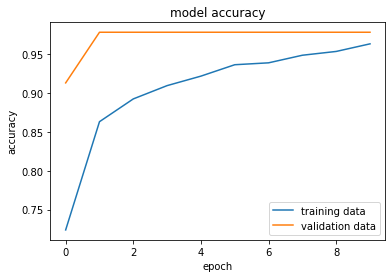

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

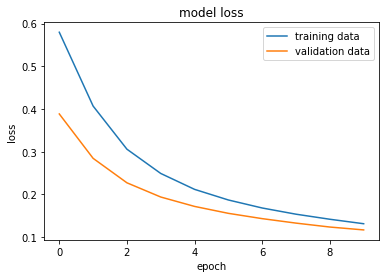

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

##**- Accuracy of the model on test data**

In [54]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 9ms/step - loss: 0.1273 - accuracy: 0.9737
0.9736841917037964


In [55]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [56]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 4ms/step


In [57]:
print(Y_pred.shape)
print(Y_pred[0]) 
# Y_pred[0] has 2 elements: the first index is the probability value for the data point to be in class 0 (Malignant) and the second index is the probability for the data point to be in class 1 (Benign)

(114, 2)
[0.35253248 0.5096883 ]


In [58]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [59]:
print(Y_pred)

[[3.52532476e-01 5.09688318e-01]
 [4.48819518e-01 6.39671922e-01]
 [7.77236596e-02 9.54797506e-01]
 [9.87053990e-01 6.04152039e-04]
 [3.99637222e-01 3.86358947e-01]
 [8.81420314e-01 2.54445001e-02]
 [2.31196865e-01 7.56302178e-01]
 [7.98084959e-02 9.39291537e-01]
 [1.82437286e-01 9.08723235e-01]
 [2.17808172e-01 8.38581443e-01]
 [5.17215550e-01 5.76673090e-01]
 [2.69769758e-01 8.00358772e-01]
 [2.57872164e-01 8.07288885e-01]
 [3.74741703e-01 7.93492496e-01]
 [1.10800140e-01 9.33896601e-01]
 [7.91043639e-01 2.42272705e-01]
 [1.21738479e-01 9.04611230e-01]
 [1.19124249e-01 8.48879755e-01]
 [1.99983135e-01 8.58543038e-01]
 [7.99560368e-01 2.34141368e-02]
 [2.80697215e-02 3.97514284e-01]
 [5.96571714e-02 8.42884183e-01]
 [2.31051281e-01 9.11577702e-01]
 [6.37717247e-02 9.06915367e-01]
 [1.26598939e-01 6.47980988e-01]
 [7.87011266e-01 6.83519691e-02]
 [2.18806252e-01 7.18833864e-01]
 [2.77573079e-01 3.83661181e-01]
 [8.56613696e-01 1.27740800e-01]
 [8.38154256e-01 1.21800557e-01]
 [3.028045

###*model.predict() gives the prediction probability of each class for that data point*

In [61]:
# using argmax function to get index of max value 

List = [0.2, 0.5]
# index 0 = 0.2
# index 1 = 0.5

index_of_max_value = np.argmax(List)
print(List)
print(index_of_max_value)

[0.2, 0.5]
1


In [63]:
# Converting the prediction probability to class labels (targets)
# As 0 means Malignant, and 1 means Benign (we can use the index as a representative of the class in this case)

Y_pred_targets = [np.argmax(i) for i in Y_pred]
print(Y_pred_targets)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


##**Building the Predictive System**

In [64]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# Change the input_data to a numpy array
input_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting for one data point (so that our model isn't confused)
input_reshaped = input_array.reshape(1,-1) #one row (one data point) and all columns (features)

# Standardizing the input data
input_std = scaler.transform(input_reshaped)

prediction = model.predict(input_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print("The tumor is Malignant")
else:
  print("The tumor is Benign")

1/1 [==============================] - 0s 21ms/step
[[0.10582116 0.8940957 ]]
[1]
The tumor is Benign


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
